# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

### Define latent distribution of the model

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.models import VAE
from jointvae.training import Trainer
from torch import optim
from viz.visualize_c import Visualizer
import matplotlib.pyplot as plt
import numpy as np



valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 32
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
#model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=5e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 2
lambda_od = 10*lambda_d
lambda_dis = 30*lambda_d 
path="figures/face/cont_{}/Beta_ {}lambda{}".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

L0Pair(256 -> 2*32, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_latent): Sequential(
    (0): L0Pair(256 -> 2*32, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
  )
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=42, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequenti

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [2]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
torch.save(model.state_dict(), 'model2_params.pkl')
torch.save(model, './model2')
##15.078 -   17.209= 0.0147 - 0.0168 error tanh 
##PLOT THE CURVE!!!!!

C:\Users\Cooper\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0/54000	Loss: 381.370	L0 Loss: 0.424
3200/54000	Loss: 240.966	L0 Loss: 0.423
6400/54000	Loss: 165.053	L0 Loss: 0.423
9600/54000	Loss: 161.032	L0 Loss: 0.423
12800/54000	Loss: 159.487	L0 Loss: 0.423
16000/54000	Loss: 156.454	L0 Loss: 0.423
19200/54000	Loss: 150.615	L0 Loss: 0.424
22400/54000	Loss: 147.313	L0 Loss: 0.424
25600/54000	Loss: 145.208	L0 Loss: 0.424
28800/54000	Loss: 131.145	L0 Loss: 0.424
32000/54000	Loss: 122.062	L0 Loss: 0.424
35200/54000	Loss: 119.039	L0 Loss: 0.424
38400/54000	Loss: 116.173	L0 Loss: 0.424
41600/54000	Loss: 113.964	L0 Loss: 0.424
44800/54000	Loss: 116.092	L0 Loss: 0.425
48000/54000	Loss: 112.073	L0 Loss: 0.425
51200/54000	Loss: 110.639	L0 Loss: 0.425
Valid Loss: 108.256, L0 Loss: 0.000
108.25591505334732
Epoch: 1 Average loss: 140.25 Valid loss: 108.25591505334732	Recon:33.124
0/54000	Loss: 98.656	L0 Loss: 0.425
3200/54000	Loss: 107.409	L0 Loss: 0.425
6400/54000	Loss: 107.625	L0 Loss: 0.426
9600/54000	Loss: 107.081	L0 Loss: 0.426
12800/54000	Loss: 106.911

16000/54000	Loss: 90.590	L0 Loss: 0.449
19200/54000	Loss: 92.014	L0 Loss: 0.449
22400/54000	Loss: 90.870	L0 Loss: 0.449
25600/54000	Loss: 89.780	L0 Loss: 0.449
28800/54000	Loss: 89.794	L0 Loss: 0.449
32000/54000	Loss: 89.723	L0 Loss: 0.449
35200/54000	Loss: 89.113	L0 Loss: 0.449
38400/54000	Loss: 90.500	L0 Loss: 0.450
41600/54000	Loss: 88.755	L0 Loss: 0.450
44800/54000	Loss: 89.045	L0 Loss: 0.450
48000/54000	Loss: 89.608	L0 Loss: 0.450
51200/54000	Loss: 90.100	L0 Loss: 0.450
Valid Loss: 89.175, L0 Loss: 0.000
89.17526740216195
Epoch: 11 Average loss: 90.03 Valid loss: 89.17526740216195	Recon:26.489
0/54000	Loss: 94.356	L0 Loss: 0.450
3200/54000	Loss: 87.858	L0 Loss: 0.450
6400/54000	Loss: 89.754	L0 Loss: 0.450
9600/54000	Loss: 88.739	L0 Loss: 0.451
12800/54000	Loss: 88.488	L0 Loss: 0.451
16000/54000	Loss: 89.949	L0 Loss: 0.451
19200/54000	Loss: 89.426	L0 Loss: 0.451
22400/54000	Loss: 88.860	L0 Loss: 0.451
25600/54000	Loss: 87.833	L0 Loss: 0.451
28800/54000	Loss: 89.747	L0 Loss: 0.451
3

35200/54000	Loss: 86.150	L0 Loss: 0.452
38400/54000	Loss: 86.224	L0 Loss: 0.452
41600/54000	Loss: 87.008	L0 Loss: 0.452
44800/54000	Loss: 86.901	L0 Loss: 0.451
48000/54000	Loss: 86.453	L0 Loss: 0.451
51200/54000	Loss: 86.115	L0 Loss: 0.451
Valid Loss: 86.474, L0 Loss: 0.000
86.47363394879281
Epoch: 21 Average loss: 86.25 Valid loss: 86.47363394879281	Recon:20.361
0/54000	Loss: 90.086	L0 Loss: 0.451
3200/54000	Loss: 86.621	L0 Loss: 0.451
6400/54000	Loss: 86.354	L0 Loss: 0.451
9600/54000	Loss: 86.023	L0 Loss: 0.451
12800/54000	Loss: 85.228	L0 Loss: 0.450
16000/54000	Loss: 85.729	L0 Loss: 0.450
19200/54000	Loss: 85.523	L0 Loss: 0.450
22400/54000	Loss: 85.698	L0 Loss: 0.450
25600/54000	Loss: 84.023	L0 Loss: 0.450
28800/54000	Loss: 85.142	L0 Loss: 0.449
32000/54000	Loss: 85.578	L0 Loss: 0.449
35200/54000	Loss: 85.166	L0 Loss: 0.449
38400/54000	Loss: 85.036	L0 Loss: 0.449
41600/54000	Loss: 84.695	L0 Loss: 0.449
44800/54000	Loss: 84.684	L0 Loss: 0.448
48000/54000	Loss: 84.192	L0 Loss: 0.448
5

Valid Loss: 82.955, L0 Loss: 0.000
82.95528712171189
Epoch: 31 Average loss: 83.46 Valid loss: 82.95528712171189	Recon:17.125
0/54000	Loss: 82.943	L0 Loss: 0.400
3200/54000	Loss: 82.679	L0 Loss: 0.400
6400/54000	Loss: 83.291	L0 Loss: 0.399
9600/54000	Loss: 82.906	L0 Loss: 0.399
12800/54000	Loss: 82.804	L0 Loss: 0.399
16000/54000	Loss: 82.373	L0 Loss: 0.398
19200/54000	Loss: 83.184	L0 Loss: 0.398
22400/54000	Loss: 83.160	L0 Loss: 0.398
25600/54000	Loss: 83.166	L0 Loss: 0.397
28800/54000	Loss: 83.125	L0 Loss: 0.397
32000/54000	Loss: 82.634	L0 Loss: 0.397
35200/54000	Loss: 83.504	L0 Loss: 0.396
38400/54000	Loss: 82.851	L0 Loss: 0.396
41600/54000	Loss: 83.191	L0 Loss: 0.396
44800/54000	Loss: 82.820	L0 Loss: 0.395
48000/54000	Loss: 82.668	L0 Loss: 0.395
51200/54000	Loss: 82.474	L0 Loss: 0.395
Valid Loss: 83.392, L0 Loss: 0.000
83.39244607154359
Epoch: 32 Average loss: 82.98 Valid loss: 83.39244607154359	Recon:17.325
0/54000	Loss: 84.732	L0 Loss: 0.394
3200/54000	Loss: 82.755	L0 Loss: 0.394


9600/54000	Loss: 81.412	L0 Loss: 0.346
12800/54000	Loss: 80.524	L0 Loss: 0.345
16000/54000	Loss: 80.751	L0 Loss: 0.345
19200/54000	Loss: 81.381	L0 Loss: 0.345
22400/54000	Loss: 80.974	L0 Loss: 0.345
25600/54000	Loss: 81.136	L0 Loss: 0.344
28800/54000	Loss: 81.317	L0 Loss: 0.344
32000/54000	Loss: 81.409	L0 Loss: 0.344
35200/54000	Loss: 80.882	L0 Loss: 0.344
38400/54000	Loss: 81.216	L0 Loss: 0.343
41600/54000	Loss: 80.936	L0 Loss: 0.343
44800/54000	Loss: 81.148	L0 Loss: 0.343
48000/54000	Loss: 80.714	L0 Loss: 0.343
51200/54000	Loss: 81.219	L0 Loss: 0.342
Valid Loss: 81.149, L0 Loss: 0.000
81.14912633692964
Epoch: 42 Average loss: 81.13 Valid loss: 81.14912633692964	Recon:17.360
0/54000	Loss: 81.932	L0 Loss: 0.342
3200/54000	Loss: 80.534	L0 Loss: 0.342
6400/54000	Loss: 81.290	L0 Loss: 0.342
9600/54000	Loss: 80.662	L0 Loss: 0.341
12800/54000	Loss: 81.048	L0 Loss: 0.341
16000/54000	Loss: 80.907	L0 Loss: 0.341
19200/54000	Loss: 80.687	L0 Loss: 0.341
22400/54000	Loss: 81.654	L0 Loss: 0.340
25

28800/54000	Loss: 79.442	L0 Loss: 0.306
32000/54000	Loss: 79.564	L0 Loss: 0.305
35200/54000	Loss: 80.054	L0 Loss: 0.305
38400/54000	Loss: 79.653	L0 Loss: 0.305
41600/54000	Loss: 79.884	L0 Loss: 0.305
44800/54000	Loss: 80.268	L0 Loss: 0.305
48000/54000	Loss: 79.386	L0 Loss: 0.305
51200/54000	Loss: 79.567	L0 Loss: 0.304
Valid Loss: 80.281, L0 Loss: 0.000
80.28123904289083
Epoch: 52 Average loss: 79.90 Valid loss: 80.28123904289083	Recon:16.045
0/54000	Loss: 80.060	L0 Loss: 0.304
3200/54000	Loss: 79.767	L0 Loss: 0.304
6400/54000	Loss: 79.456	L0 Loss: 0.304
9600/54000	Loss: 79.708	L0 Loss: 0.304
12800/54000	Loss: 81.114	L0 Loss: 0.304
16000/54000	Loss: 80.751	L0 Loss: 0.303
19200/54000	Loss: 80.745	L0 Loss: 0.303
22400/54000	Loss: 80.104	L0 Loss: 0.303
25600/54000	Loss: 80.459	L0 Loss: 0.303
28800/54000	Loss: 80.064	L0 Loss: 0.303
32000/54000	Loss: 79.203	L0 Loss: 0.303
35200/54000	Loss: 80.023	L0 Loss: 0.302
38400/54000	Loss: 80.529	L0 Loss: 0.302
41600/54000	Loss: 80.203	L0 Loss: 0.302
4

48000/54000	Loss: 78.965	L0 Loss: 0.281
51200/54000	Loss: 79.282	L0 Loss: 0.281
Valid Loss: 79.258, L0 Loss: 0.000
79.25769237761801
Epoch: 62 Average loss: 79.14 Valid loss: 79.25769237761801	Recon:18.116
0/54000	Loss: 78.167	L0 Loss: 0.280
3200/54000	Loss: 79.268	L0 Loss: 0.280
6400/54000	Loss: 78.902	L0 Loss: 0.280
9600/54000	Loss: 79.266	L0 Loss: 0.280
12800/54000	Loss: 79.259	L0 Loss: 0.280
16000/54000	Loss: 79.083	L0 Loss: 0.280
19200/54000	Loss: 79.503	L0 Loss: 0.280
22400/54000	Loss: 78.878	L0 Loss: 0.280
25600/54000	Loss: 79.425	L0 Loss: 0.280
28800/54000	Loss: 79.702	L0 Loss: 0.280
32000/54000	Loss: 80.125	L0 Loss: 0.280
35200/54000	Loss: 79.966	L0 Loss: 0.279
38400/54000	Loss: 78.617	L0 Loss: 0.279
41600/54000	Loss: 79.492	L0 Loss: 0.279
44800/54000	Loss: 79.014	L0 Loss: 0.279
48000/54000	Loss: 78.650	L0 Loss: 0.279
51200/54000	Loss: 79.040	L0 Loss: 0.279
Valid Loss: 79.036, L0 Loss: 0.000
79.03618353985726
Epoch: 63 Average loss: 79.30 Valid loss: 79.03618353985726	Recon:15

0/54000	Loss: 77.286	L0 Loss: 0.268
3200/54000	Loss: 78.772	L0 Loss: 0.268
6400/54000	Loss: 79.016	L0 Loss: 0.268
9600/54000	Loss: 80.501	L0 Loss: 0.268
12800/54000	Loss: 79.493	L0 Loss: 0.268
16000/54000	Loss: 78.972	L0 Loss: 0.268
19200/54000	Loss: 79.026	L0 Loss: 0.268
22400/54000	Loss: 79.112	L0 Loss: 0.268
25600/54000	Loss: 78.774	L0 Loss: 0.268
28800/54000	Loss: 79.290	L0 Loss: 0.268
32000/54000	Loss: 78.667	L0 Loss: 0.268
35200/54000	Loss: 78.575	L0 Loss: 0.268
38400/54000	Loss: 78.398	L0 Loss: 0.268
41600/54000	Loss: 78.514	L0 Loss: 0.268
44800/54000	Loss: 78.887	L0 Loss: 0.268
48000/54000	Loss: 77.966	L0 Loss: 0.268
51200/54000	Loss: 78.781	L0 Loss: 0.267
Valid Loss: 78.997, L0 Loss: 0.000
78.99713045485477
Epoch: 73 Average loss: 78.96 Valid loss: 78.99713045485477	Recon:16.520
0/54000	Loss: 80.730	L0 Loss: 0.267
3200/54000	Loss: 78.583	L0 Loss: 0.267
6400/54000	Loss: 79.023	L0 Loss: 0.267
9600/54000	Loss: 79.330	L0 Loss: 0.267
12800/54000	Loss: 78.872	L0 Loss: 0.267
16000/54

19200/54000	Loss: 77.761	L0 Loss: 0.262
22400/54000	Loss: 77.905	L0 Loss: 0.262
25600/54000	Loss: 78.089	L0 Loss: 0.262
28800/54000	Loss: 79.284	L0 Loss: 0.262
32000/54000	Loss: 78.926	L0 Loss: 0.262
35200/54000	Loss: 78.725	L0 Loss: 0.262
38400/54000	Loss: 78.631	L0 Loss: 0.262
41600/54000	Loss: 78.462	L0 Loss: 0.261
44800/54000	Loss: 78.667	L0 Loss: 0.261
48000/54000	Loss: 78.561	L0 Loss: 0.261
51200/54000	Loss: 78.498	L0 Loss: 0.261
Valid Loss: 79.370, L0 Loss: 0.000
79.3699314036268
Epoch: 83 Average loss: 78.42 Valid loss: 79.3699314036268	Recon:17.099
0/54000	Loss: 78.601	L0 Loss: 0.261
3200/54000	Loss: 78.159	L0 Loss: 0.261
6400/54000	Loss: 77.790	L0 Loss: 0.261
9600/54000	Loss: 77.570	L0 Loss: 0.261
12800/54000	Loss: 77.565	L0 Loss: 0.261
16000/54000	Loss: 78.344	L0 Loss: 0.261
19200/54000	Loss: 78.466	L0 Loss: 0.261
22400/54000	Loss: 78.355	L0 Loss: 0.261
25600/54000	Loss: 77.984	L0 Loss: 0.261
28800/54000	Loss: 78.788	L0 Loss: 0.261
32000/54000	Loss: 78.776	L0 Loss: 0.261
352

38400/54000	Loss: 77.863	L0 Loss: 0.260
41600/54000	Loss: 78.372	L0 Loss: 0.260
44800/54000	Loss: 78.211	L0 Loss: 0.260
48000/54000	Loss: 77.623	L0 Loss: 0.260
51200/54000	Loss: 77.418	L0 Loss: 0.260
Valid Loss: 78.754, L0 Loss: 0.000
78.75361162550907
Epoch: 93 Average loss: 77.81 Valid loss: 78.75361162550907	Recon:16.162
0/54000	Loss: 79.443	L0 Loss: 0.260
3200/54000	Loss: 77.838	L0 Loss: 0.260
6400/54000	Loss: 78.052	L0 Loss: 0.260
9600/54000	Loss: 77.310	L0 Loss: 0.260
12800/54000	Loss: 77.798	L0 Loss: 0.260
16000/54000	Loss: 77.572	L0 Loss: 0.260
19200/54000	Loss: 78.169	L0 Loss: 0.260
22400/54000	Loss: 77.827	L0 Loss: 0.260
25600/54000	Loss: 78.040	L0 Loss: 0.260
28800/54000	Loss: 78.604	L0 Loss: 0.260
32000/54000	Loss: 78.111	L0 Loss: 0.260
35200/54000	Loss: 77.463	L0 Loss: 0.260
38400/54000	Loss: 77.675	L0 Loss: 0.260
41600/54000	Loss: 77.754	L0 Loss: 0.260
44800/54000	Loss: 78.125	L0 Loss: 0.260
48000/54000	Loss: 78.417	L0 Loss: 0.260
51200/54000	Loss: 78.544	L0 Loss: 0.260
V

In [18]:
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
model.load_state_dict(torch.load('model2_params.pkl'))
path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(loss["DIP_loss"])

L0Pair(256 -> 2*32, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
[63.99287796020508, 63.9802360534668, 63.94889831542969, 63.8729248046875, 63.75138854980469, 64.27349853515625, 63.74251174926758, 63.86640930175781, 63.93327331542969, 63.956478118896484, 63.96845626831055, 63.95899963378906, 63.96040725708008, 63.9640998840332, 63.9759407043457, 63.97178268432617, 63.977020263671875, 63.97390365600586, 63.97576904296875, 63.9778938293457, 63.97560501098633, 63.97728729248047, 63.978179931640625, 63.97858428955078, 63.978885650634766, 63.98093032836914, 63.98174285888672, 63.97649002075195, 63.984153747558594, 63.9754753112793, 63.980648040771484, 63.976139068603516, 63.976806640625, 63.97813415527344, 63.96414566040039, 63.970760345458984, 63.965187072753906, 63.944580078125, 63.92241287231445, 63.84663772583008, 63.79420852661133, 63.80489730834961, 63.81488037109375, 63.72954559326172, 63.713035583496094, 63.727439880371094, 63.645565032958984,

# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

unsaved tensor([[0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
         0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.]],
       device='cuda:0', grad_fn=<ViewBackward>)
(8, 8)
1.0


C:\Users\Cooper\ISO\PrunedVAE\ISO\viz\visualize_c.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)
C:\Users\Cooper\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


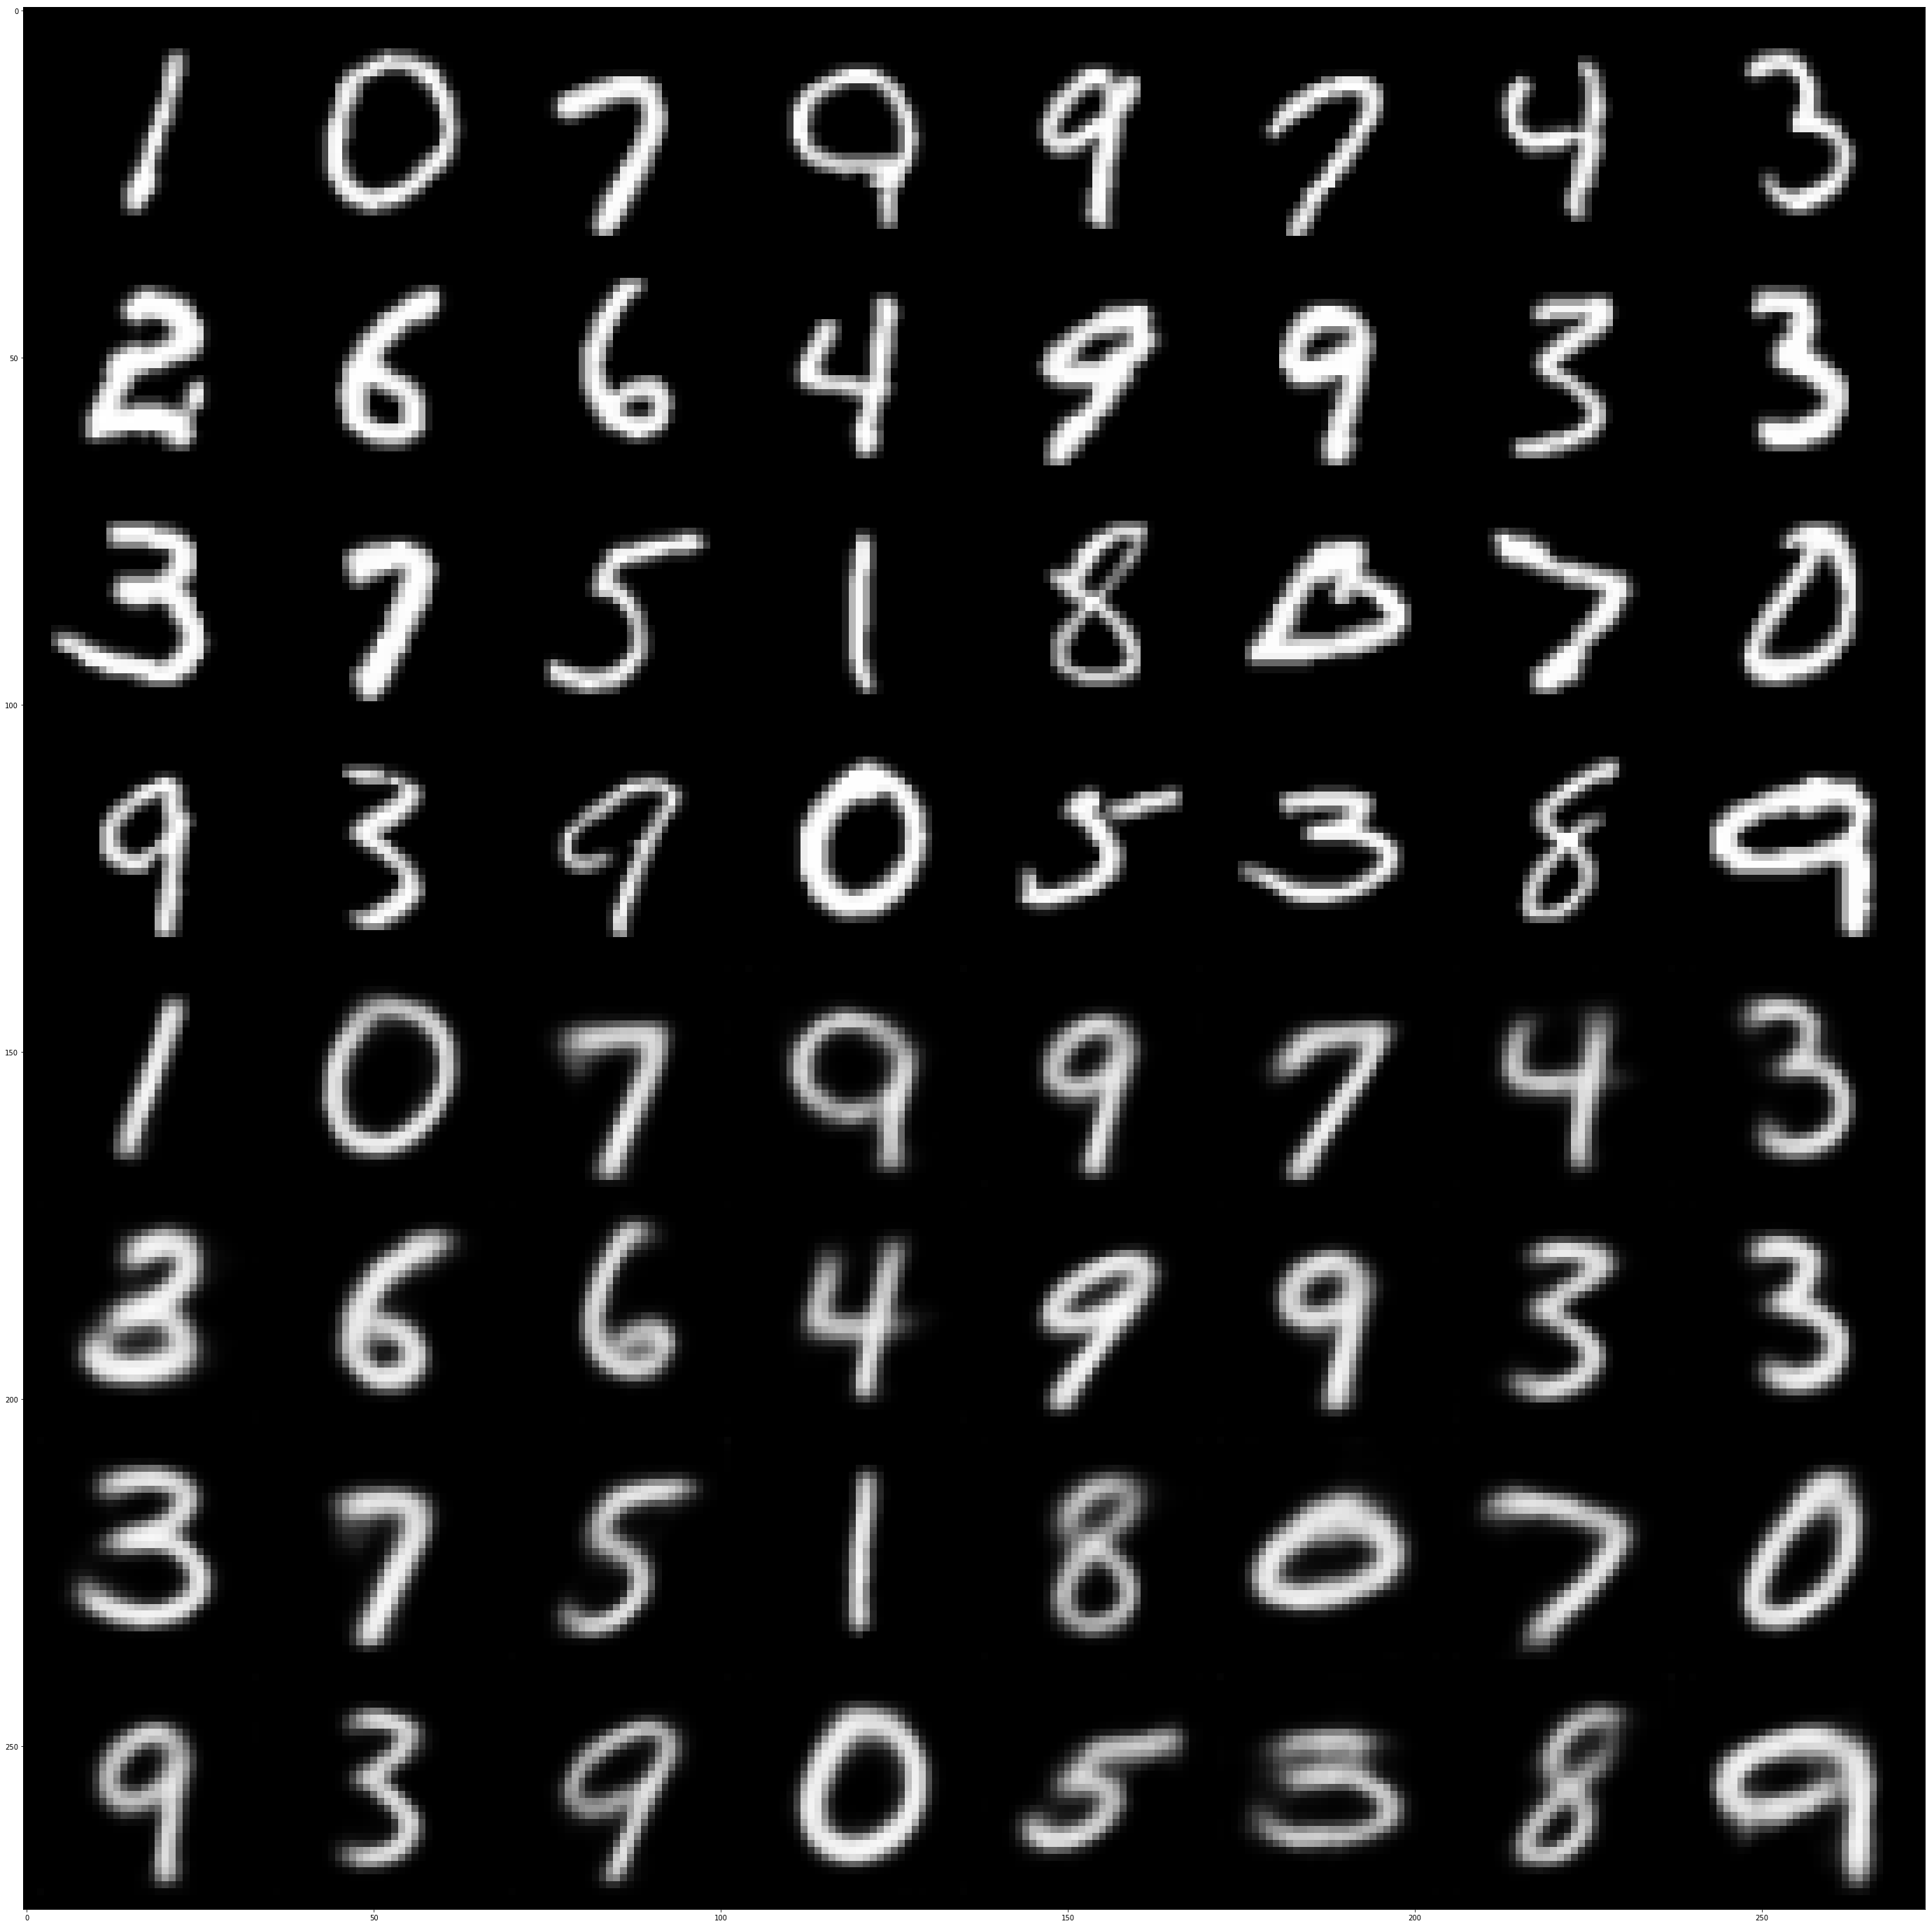

In [4]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50, 50)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
# recon=np.rollaxis(recon.numpy(), 0, 3)  
# print(recon[265:,:,:].max())
# recon[:,:,:]=(recon[:,:,:]+1)/2
# plt.imshow(recon[:,:,:].astype(float))

#MNIST
plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
#plt.savefig(path+"/recon.png")
print(recon.numpy()[0, :, :].max())



In [5]:
test_batch = iter(test_loader)
test_batch = next(test_batch)
latent_dist,mask,_ = model.encode(torch.tensor(test_batch[0]).cuda())

print(mask)

# for latent in latent_dist['cont'][0]:
#     count=torch.zeros((1,32))
#     latent[latent<1e-7]=0
    
#     for i in range(128):
    
#     #print(latent[i].size(),torch.nonzero(latent[i]))#len(torch.nonzero(latent[0]==0))
#         count[latent[i].reshape(1,32)!=0] += 1
#     print(count)
    

tensor([[0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
         0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.]],
       device='cuda:0', grad_fn=<ViewBackward>)


C:\Users\Cooper\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Cooper\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


C:\Users\Cooper\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Cooper\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Cooper\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


torch.Size([64, 42]) 0
torch.Size([64, 42]) 1
torch.Size([64, 42]) 2
torch.Size([64, 42]) 3
torch.Size([64, 42]) 4
torch.Size([64, 42]) 5
torch.Size([64, 42]) 6
torch.Size([64, 42]) 7
torch.Size([64, 42]) 8
torch.Size([64, 42]) 9


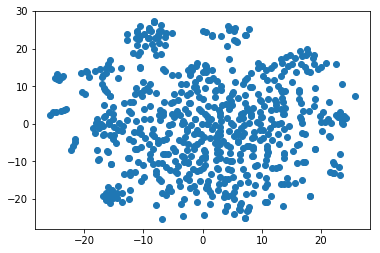

In [6]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist,_ ,_= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    print(new_samples.shape,i)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

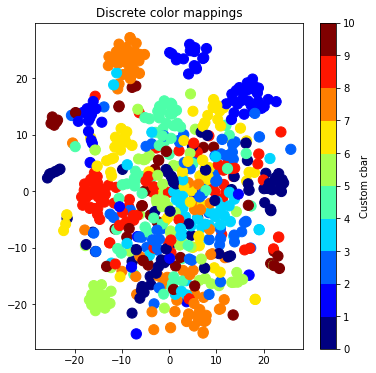

In [7]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

0.5


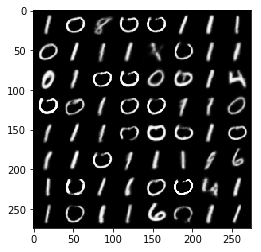

In [8]:
# Plot samples
import matplotlib as mpl

#MNIST
samples = viz.samples()
sample=samples.numpy()[0, :, :]/2+0.5
plt.imshow(sample, cmap='gray')
plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

print((sample).min())

# face
# fig = plt.figure(figsize=(50, 50)) 
# samples = viz.samples()
# samples = np.rollaxis(samples.numpy(), 0, 3)  
# print(samples[:,:,0].max())
# samples=(samples+1)/2
# plt.imshow(samples.astype(float),norm = norm)
# plt.imsave(path+"/samples",samples)
###DIP

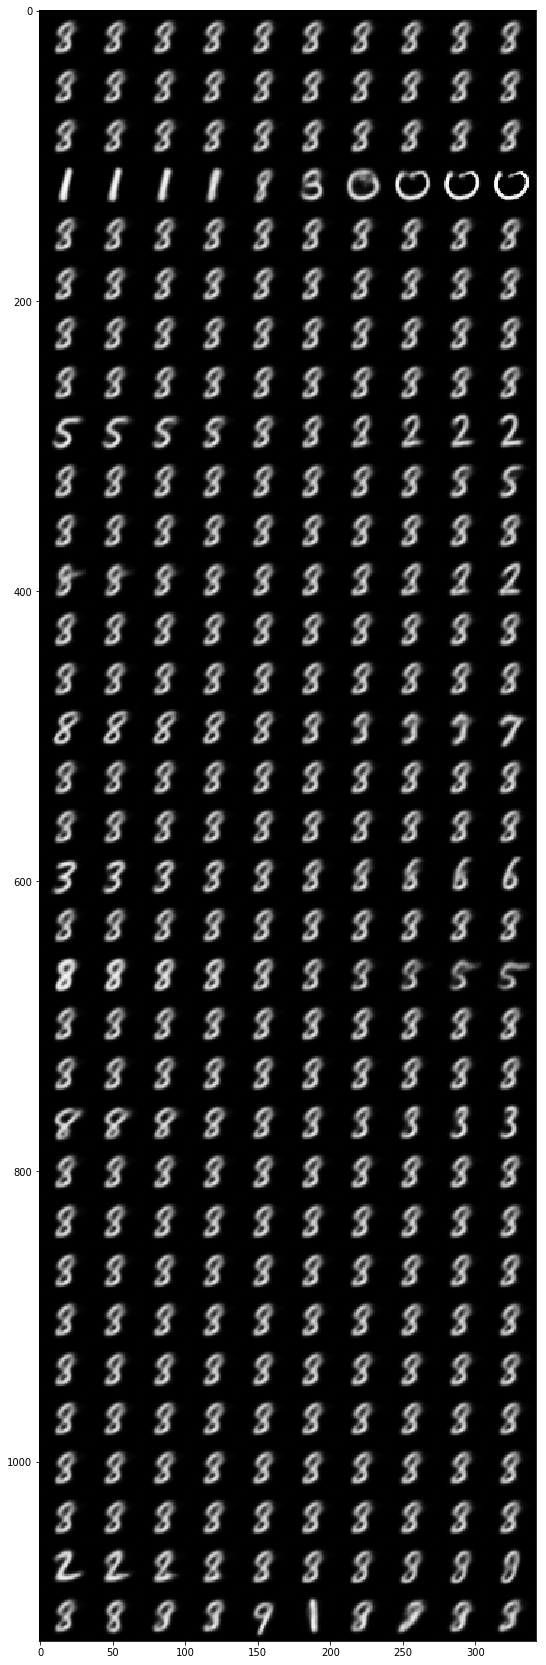

In [9]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)  
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

0.9414167

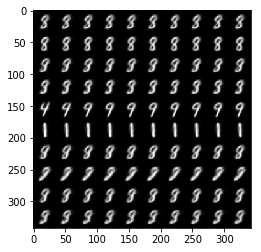

In [10]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=2, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

traversals.numpy()[0, :, :].max()
#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

continuous
0.88945055 0.0
0.8807499 0.0
0.8822903 0.0
0.9998585 0.0
0.8827666 0.0
0.87752354 0.0
0.8797297 0.0
0.88090986 0.0
0.9297263 0.0
0.9028333 0.0
0.8789522 0.0
0.8881249 0.0
0.8818642 0.0
0.88354766 0.0
0.9078407 0.0
0.8886528 0.0
0.88318884 0.0
0.92996377 0.0
0.8823109 0.0
0.9560013 0.0
0.88340074 0.0
0.8795683 0.0
0.9053662 0.0
0.87767714 0.0
0.8891584 0.0
0.8780636 0.0
0.8814082 0.0
0.8857763 0.0
0.8794582 0.0
0.87954605 0.0
0.8786454 0.0
0.91001636 0.0


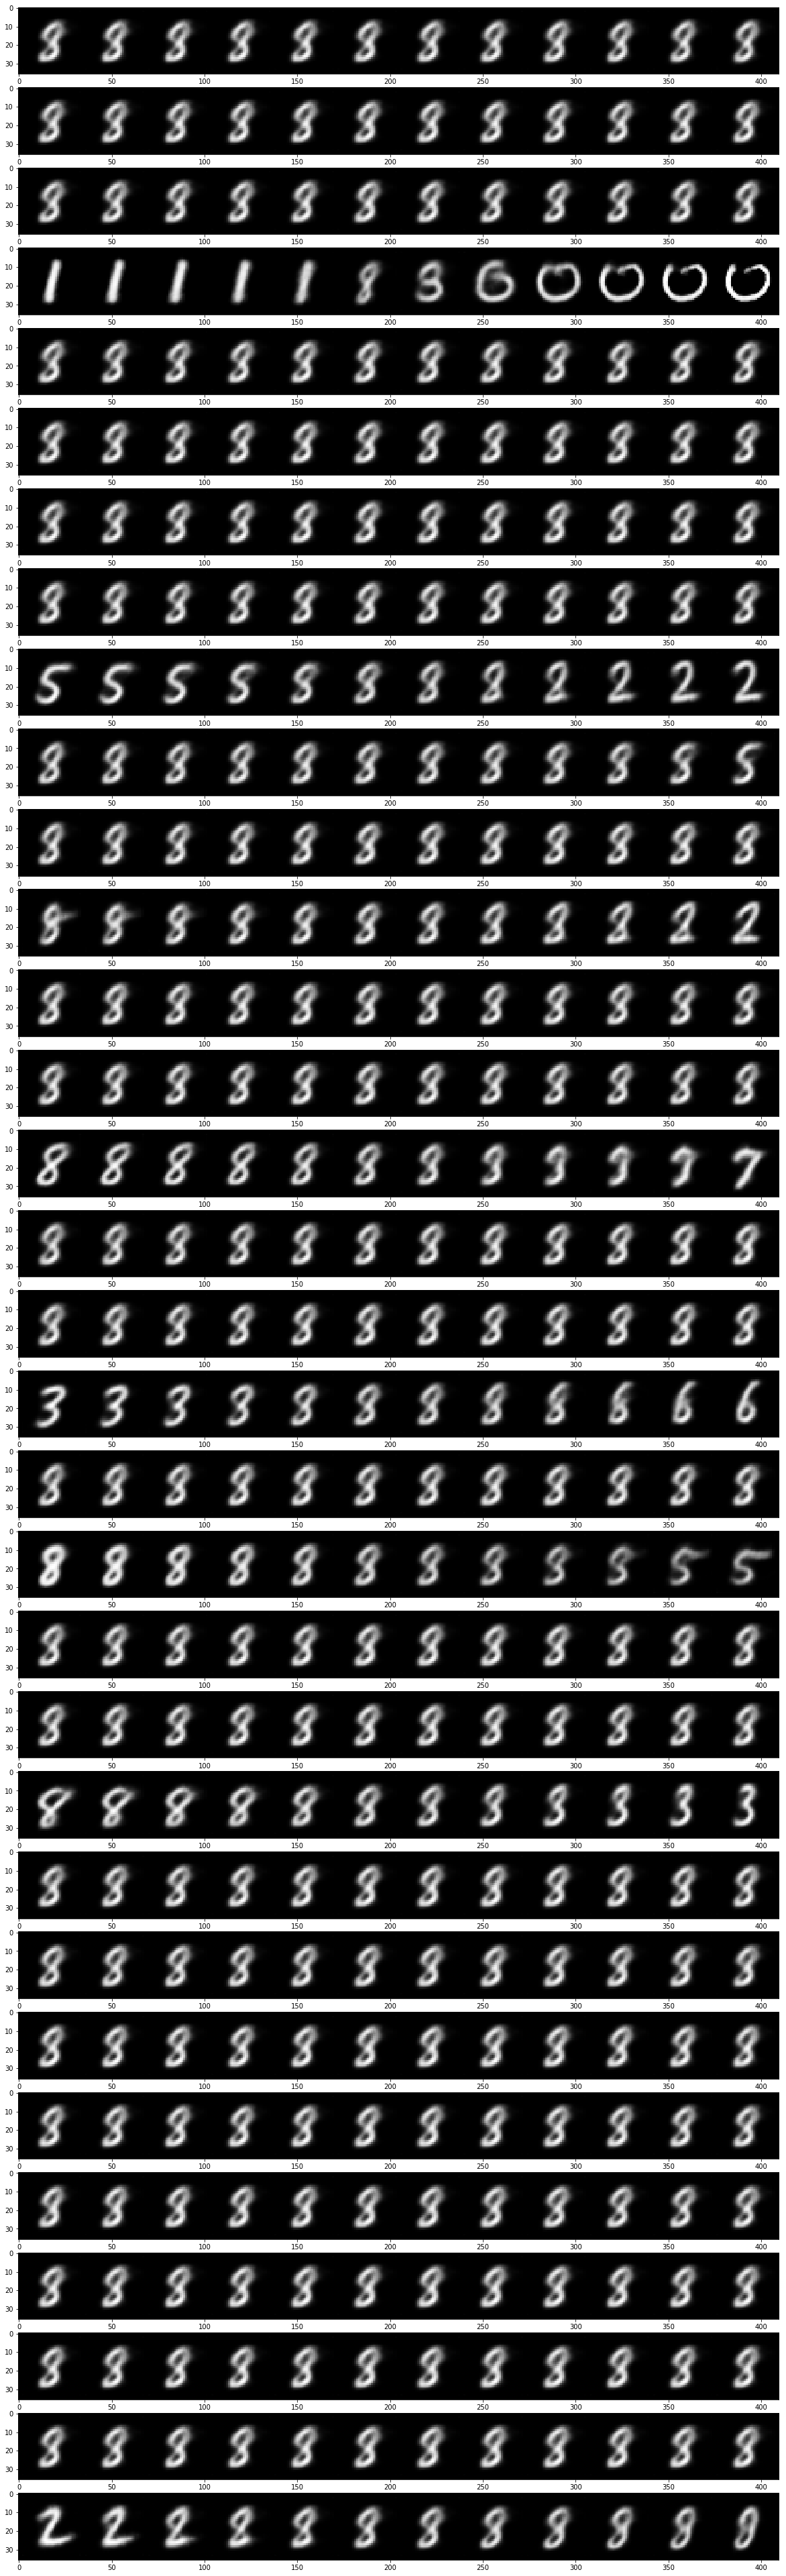

In [11]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
    sub = fig.add_subplot(n_cont, 1, i + 1)
    plt.savefig(path+"/cont{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    print(traversals.numpy()[0, :, :].max(),traversals.numpy()[0, :, :].min())
    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     traversals=(traversals+1)/2
#     plt.imshow(traversals)   
plt.savefig(path+"/cont.png")
    
    
  # width, height in inches



# for i in range(n_cont):
#     traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None)
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# for i in range(n_disc):
#     traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i)
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    

discrete


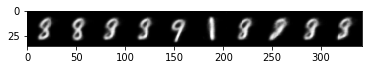

In [12]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
    sub = fig.add_subplot(n_disc, 1, i + 1)
    plt.savefig(path+"/disc{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_disc, 1, i + 1)
# traversals=(traversals+1)/2
# plt.savefig(path+"/disc{}.png".format(i))
# plt.imshow(traversals)

In [13]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#         # Generate latent traversal
# #         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
# #                                                              disc_idx=disc_idx,
# #                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
#         generated = (generated +1)/2
#         print(generated.min(),generated.max())
#         plt.imshow(generated)

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#             result = model.decode(latent_samples).cpu()
#         return result

#MNIST
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        plt.imshow(generated.detach().numpy(),cmap="gray")

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
        return model.decode(latent_samples).cpu()

In [14]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

interactive(children=(IntSlider(value=16, description='cont_idx', max=32), FloatSlider(value=0.0, description='cont_v', max=2.5, min=-2.5, step=0.5), IntSlider(value=4, description='disc_idx', max=9), Checkbox(value=True, description='prior'), Output()), _dom_classes=('widget-interact',))